In [1]:
## Starting a Spark session so as to build the project
from pyspark.sql import SparkSession
spark = SparkSession \
    .builder \
    .appName("Meetup") \
    .getOrCreate()

In [52]:
from pyspark.sql.functions import col, asc, year, month, dayofmonth
from pyspark.sql.types import IntegerType

In [58]:
%matplotlib inline
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
import numpy as np

In [2]:
## Loading data from meetup dataset
meetup_groups = spark.read.format("csv").option("header", "true") \
.load('C:\\Users\\xyz\\Documents\\ISBCBA\Term1\\Big Data Management\\GroupAssignement\\meetups-data-from-meetupcom\\groups.csv')
meetup_members = spark.read.format("csv").option("header", "true")\
.load('C:\\Users\\xyz\\Documents\\ISBCBA\Term1\\Big Data Management\\GroupAssignement\\meetups-data-from-meetupcom\\members.csv')
meetup_events = spark.read.format("csv").option("header","true")\
.load('C:\\Users\\xyz\\Documents\\ISBCBA\Term1\\Big Data Management\\GroupAssignement\\meetups-data-from-meetupcom\\events.csv')
meetup_topics = spark.read.format("csv").option("header","true")\
.load('C:\\Users\\xyz\\Documents\\ISBCBA\Term1\\Big Data Management\\GroupAssignement\\meetups-data-from-meetupcom\\topics.csv')
meetup_grouptopics = spark.read.format("csv").option("header","true")\
.load('C:\\Users\\xyz\\Documents\\ISBCBA\Term1\\Big Data Management\\GroupAssignement\\meetups-data-from-meetupcom\\groups_topics.csv')
meetup_categories = spark.read.format("csv").option("header","true")\
.load('C:\\Users\\xyz\\Documents\\ISBCBA\Term1\\Big Data Management\\GroupAssignement\\meetups-data-from-meetupcom\\categories.csv')
meetup_cities = spark.read.format("csv").option("header","true")\
.load('C:\\Users\\xyz\\Documents\\ISBCBA\Term1\\Big Data Management\\GroupAssignement\\meetups-data-from-meetupcom\\cities.csv')
meetup_membertopics = spark.read.format("csv").option("header","true")\
.load('C:\\Users\\xyz\\Documents\\ISBCBA\Term1\\Big Data Management\\GroupAssignement\\meetups-data-from-meetupcom\\members_topics.csv')
meetup_venues = spark.read.format("csv").option("header","true")\
.load('C:\\Users\\xyz\\Documents\\ISBCBA\Term1\\Big Data Management\\GroupAssignement\\meetups-data-from-meetupcom\\venues.csv')

In [28]:
## dimensiones of dataset
print('meetup groups : ',(meetup_groups.count(), len(meetup_groups.columns)))

print('meetup_categories :',(meetup_categories.count(),len(meetup_categories.columns)))
print('meetup_cities: ',(meetup_cities.count(),len(meetup_cities.columns)))
print('meetup_events :',(meetup_events.count(),len(meetup_events.columns)))
print('meetup_grouptopics :',(meetup_grouptopics.count(),len(meetup_grouptopics.columns)))
print('meetup_members :',(meetup_members.count(),len(meetup_members.columns)))
print('meetup_membertopics :',(meetup_membertopics.count(),len(meetup_membertopics.columns)))
print('meetup_topics :',(meetup_topics.count(),len(meetup_topics.columns)))
print('meetup_venues :',(meetup_venues.count(),len(meetup_venues.columns)))

meetup groups :  (16330, 36)
meetup_categories : (33, 4)
meetup_cities:  (13, 11)
meetup_events : (5807, 48)
meetup_grouptopics : (31212, 4)
meetup_members : (5893886, 14)
meetup_membertopics : (3195245, 4)
meetup_topics : (2509, 7)
meetup_venues : (107093, 14)


In [3]:
## Displaying first 3 rows from the groups data set
meetup_groups.show(3)

+--------+-----------+--------------------+--------------------+-------+--------+-------+-------------------+--------------------+--------------------+------------------------+--------------------+----------------------+----------------------+----------------+---------+-----------+--------------------+------------+-------+--------------------+-------------------+--------------+------------------------+----------------------------+------------------------+--------------------------+--------------------------+--------------------+------+-----+----------+--------------------+----------+----------+--------------------+
|group_id|category_id|       category.name|  category.shortname|city_id|    city|country|            created|         description|group_photo.base_url|group_photo.highres_link|group_photo.photo_id|group_photo.photo_link|group_photo.thumb_link|group_photo.type|join_mode|        lat|                link|         lon|members|          group_name|organizer.member_id|organizer.na

In [4]:
## Inspecting the meetup groups data
meetup_groups.describe().show()

+-------+--------------------+------------------+-------------+------------------+------------------+-------------+-------+-------------------+--------------------+--------------------+------------------------+--------------------+----------------------+----------------------+----------------+---------+------------------+--------------------+------------------+-----------------+--------------------+-------------------+--------------+------------------------+----------------------------+------------------------+--------------------------+--------------------------+--------------------+-----------------+-----+----------+---------+-------------------+--------------+--------------+
|summary|            group_id|       category_id|category.name|category.shortname|           city_id|         city|country|            created|         description|group_photo.base_url|group_photo.highres_link|group_photo.photo_id|group_photo.photo_link|group_photo.thumb_link|group_photo.type|join_mode|         

In [5]:
## Displaying the column information for the meetup groups
meetup_groups.columns

['group_id',
 'category_id',
 'category.name',
 'category.shortname',
 'city_id',
 'city',
 'country',
 'created',
 'description',
 'group_photo.base_url',
 'group_photo.highres_link',
 'group_photo.photo_id',
 'group_photo.photo_link',
 'group_photo.thumb_link',
 'group_photo.type',
 'join_mode',
 'lat',
 'link',
 'lon',
 'members',
 'group_name',
 'organizer.member_id',
 'organizer.name',
 'organizer.photo.base_url',
 'organizer.photo.highres_link',
 'organizer.photo.photo_id',
 'organizer.photo.photo_link',
 'organizer.photo.thumb_link',
 'organizer.photo.type',
 'rating',
 'state',
 'timezone',
 'urlname',
 'utc_offset',
 'visibility',
 'who']

In [6]:
## Displaying the schema 
meetup_groups.printSchema()

root
 |-- group_id: string (nullable = true)
 |-- category_id: string (nullable = true)
 |-- category.name: string (nullable = true)
 |-- category.shortname: string (nullable = true)
 |-- city_id: string (nullable = true)
 |-- city: string (nullable = true)
 |-- country: string (nullable = true)
 |-- created: string (nullable = true)
 |-- description: string (nullable = true)
 |-- group_photo.base_url: string (nullable = true)
 |-- group_photo.highres_link: string (nullable = true)
 |-- group_photo.photo_id: string (nullable = true)
 |-- group_photo.photo_link: string (nullable = true)
 |-- group_photo.thumb_link: string (nullable = true)
 |-- group_photo.type: string (nullable = true)
 |-- join_mode: string (nullable = true)
 |-- lat: string (nullable = true)
 |-- link: string (nullable = true)
 |-- lon: string (nullable = true)
 |-- members: string (nullable = true)
 |-- group_name: string (nullable = true)
 |-- organizer.member_id: string (nullable = true)
 |-- organizer.name: strin

In [7]:
## Displaying the datatypes
meetup_groups.dtypes

[('group_id', 'string'),
 ('category_id', 'string'),
 ('category.name', 'string'),
 ('category.shortname', 'string'),
 ('city_id', 'string'),
 ('city', 'string'),
 ('country', 'string'),
 ('created', 'string'),
 ('description', 'string'),
 ('group_photo.base_url', 'string'),
 ('group_photo.highres_link', 'string'),
 ('group_photo.photo_id', 'string'),
 ('group_photo.photo_link', 'string'),
 ('group_photo.thumb_link', 'string'),
 ('group_photo.type', 'string'),
 ('join_mode', 'string'),
 ('lat', 'string'),
 ('link', 'string'),
 ('lon', 'string'),
 ('members', 'string'),
 ('group_name', 'string'),
 ('organizer.member_id', 'string'),
 ('organizer.name', 'string'),
 ('organizer.photo.base_url', 'string'),
 ('organizer.photo.highres_link', 'string'),
 ('organizer.photo.photo_id', 'string'),
 ('organizer.photo.photo_link', 'string'),
 ('organizer.photo.thumb_link', 'string'),
 ('organizer.photo.type', 'string'),
 ('rating', 'string'),
 ('state', 'string'),
 ('timezone', 'string'),
 ('urlname

In [8]:
## Inspecting the data to find the id's
meetup_groups.select('group_id','category_id','group_name','members','`category.shortname`').show(5)

+--------+-----------+--------------------+-------+--------------------+
|group_id|category_id|          group_name|members|  category.shortname|
+--------+-----------+--------------------+-------+--------------------+
|    6388|         14|Alternative Healt...|   1440|    health-wellbeing|
|    6510|          4|Alternative Energ...|    969|community-environ...|
|    8458|         26|   NYC Animal Rights|   2930|        pets-animals|
|    8940|         29|The New York City...|   5080|      sci-fi-fantasy|
|   10104|         26|  NYC Pit Bull Group|   2097|        pets-animals|
+--------+-----------+--------------------+-------+--------------------+
only showing top 5 rows



In [9]:
## Creating SQL View
meetup_categories.createOrReplaceTempView("meetup_categories_view")

In [10]:
## Displaying first 5 rows from the view using SQL
spark.sql("select * from meetup_categories_view").show(5)

+-----------+--------------------+---------+--------------------+
|category_id|       category_name|shortname|           sort_name|
+-----------+--------------------+---------+--------------------+
|          1|      Arts & Culture|     Arts|      Arts & Culture|
|          2|   Career & Business| Business|   Career & Business|
|          3|  Cars & Motorcycles|     Auto|  Cars & Motorcycles|
|          4|Community & Envir...|Community|Community & Envir...|
|          5|             Dancing|  Dancing|             Dancing|
+-----------+--------------------+---------+--------------------+
only showing top 5 rows



In [16]:
meetup_events.columns

['event_id',
 'created',
 'description',
 'duration',
 'event_url',
 'fee.accepts',
 'fee.amount',
 'fee.currency',
 'fee.description',
 'fee.label',
 'fee.required',
 'group.created',
 'group.group_lat',
 'group.group_lon',
 'group_id',
 'group.join_mode',
 'group.name',
 'group.urlname',
 'group.who',
 'headcount',
 'how_to_find_us',
 'maybe_rsvp_count',
 'event_name',
 'photo_url',
 'rating.average',
 'rating.count',
 'rsvp_limit',
 'event_status',
 'event_time',
 'updated',
 'utc_offset',
 'venue.address_1',
 'venue.address_2',
 'venue.city',
 'venue.country',
 'venue_id',
 'venue.lat',
 'venue.localized_country_name',
 'venue.lon',
 'venue.name',
 'venue.phone',
 'venue.repinned',
 'venue.state',
 'venue.zip',
 'visibility',
 'waitlist_count',
 'why',
 'yes_rsvp_count']

In [18]:
### Examine the data
## Find the total number of groups, memebers, topics, categories
## Total number of tickets is 10803028
print('Total groups: ' + str(meetup_groups.select('group_id').distinct().count()))
print('Total members: ' + str(meetup_members.select('member_id').distinct().count()))
print('Total category: ' + str(meetup_categories.select('category_id').distinct().count()))
print('Total topics: ' + str(meetup_topics.select('topic_id').distinct().count()))
print('Total events: ' + str(meetup_events.select('event_id').distinct().count()))

Total groups: 16330
Total members: 1087923
Total category: 33
Total topics: 2509
Total events: 5807


In [22]:
## Examine members data
## find top 20 members who are part of maximum groups
meetup_members.groupBy('member_id','member_name').agg({'member_id':'count'}).sort(col('count(member_id)').desc()).show(20)

+---------+--------------------+----------------+
|member_id|         member_name|count(member_id)|
+---------+--------------------+----------------+
|  1237529|      Suhas Valanjoo|            1177|
|234109385|            Lucy Tao|             938|
| 39767972|      Sam darkington|             654|
|  3893698|               Huang|             645|
|228242091|        Parul Bansal|             612|
| 12093969|                John|             600|
| 47415772|            anh pham|             599|
|115329562|      Zachary Fintel|             589|
|  1675958|              Joshua|             577|
|  8468628|      Steve Cirvello|             572|
| 13526261|Christopher Pouss...|             558|
|  4379102|               Scott|             548|
|  5620776|              Jessie|             533|
|  2853561|          Sze Ki Pat|             527|
|142605152|          Michael Y.|             516|
|195425500|            Cat Song|             485|
| 65246162|          ali sheikh|             483|


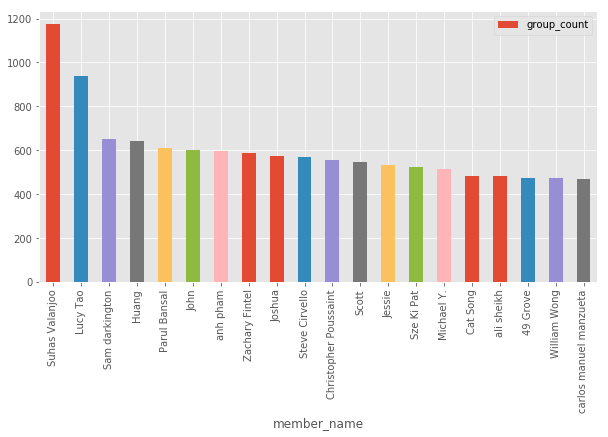

In [76]:
df_meetup_members = pd.DataFrame(meetup_members\
.groupBy('member_id','member_name')\
.agg({'member_id':'count'})\
.sort(col('count(member_id)').desc()).head(20),columns=['member_id','member_name','group_count'])
df_meetup_members.plot('member_name','group_count',kind='bar',figsize=(10,5))

In [23]:
## Top 20 trending/most discussed member topics
meetup_membertopics.groupBy('topic_id','topic_name').agg({'member_id':'count'}).sort(col('count(member_id)').desc()).show(20)

+--------+--------------------+----------------+
|topic_id|          topic_name|count(member_id)|
+--------+--------------------+----------------+
|   15046|            outdoors|          160829|
|    9696|             newtech|          142536|
|    1502|                 art|          132901|
|    1201|              movies|          103915|
|     611|                wine|           97698|
|   15018|               music|           94133|
|   17558|     performing-arts|           87294|
|   10451|              sports|           81124|
|   10581|              social|           74925|
|   10306|            wellness|           74856|
|     223|               photo|           72355|
|   10454|            language|           70488|
|   19130|eating-drinking-t...|           69256|
|   17571|             dancing|           57129|
|   17201|      20s-30s-social|           55729|
|   16216|   mobile-technology|           54202|
|   10099|           craftswap|           53405|
|    7203|          

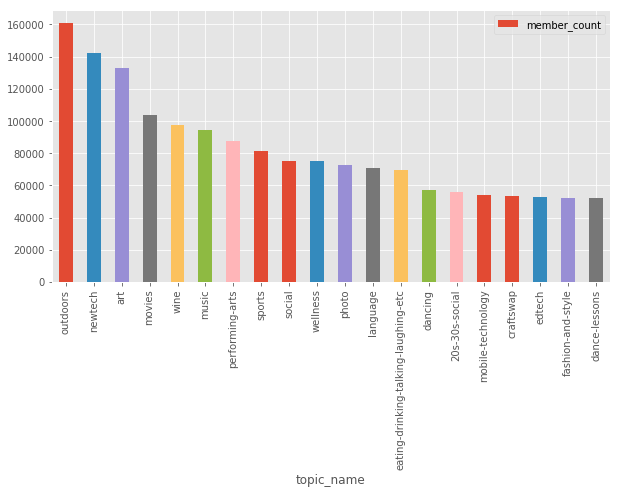

In [80]:
df_meetup_membertopics = pd.DataFrame(meetup_membertopics\
.groupBy('topic_id','topic_name')\
.agg({'member_id':'count'})\
.sort(col('count(member_id)').desc()).head(20),columns=['topic_id','topic_name','member_count'])
df_meetup_membertopics.plot('topic_name','member_count',kind='bar',figsize=(10,5))

In [25]:
## Top 20 trending/most discussed in groups
meetup_grouptopics.groupBy('topic_id','topic_name').agg({'group_id':'count'}).sort(col('count(group_id)').desc()).show(20)

+--------+--------------------+---------------+
|topic_id|          topic_name|count(group_id)|
+--------+--------------------+---------------+
|    4422|   Social Networking|           1848|
|   15720|Professional Netw...|           1582|
|   10581|              Social|           1447|
|    9696|      New Technology|           1239|
|   10290|        Spirituality|            916|
|   10209|      Web Technology|            852|
|   10306|            Wellness|            790|
|   10232|      Women's Social|            749|
|   15046|            Outdoors|            676|
|   10579|          Technology|            625|
|   17571|             Dancing|            477|
|   16216|   Mobile Technology|            474|
|   17658|    Spiritual Growth|            434|
|   15405|Business Referral...|            427|
|   10454|  Language & Culture|            413|
|   15018|               Music|            371|
|     611|                Wine|            356|
|   17558|     Performing Arts|         

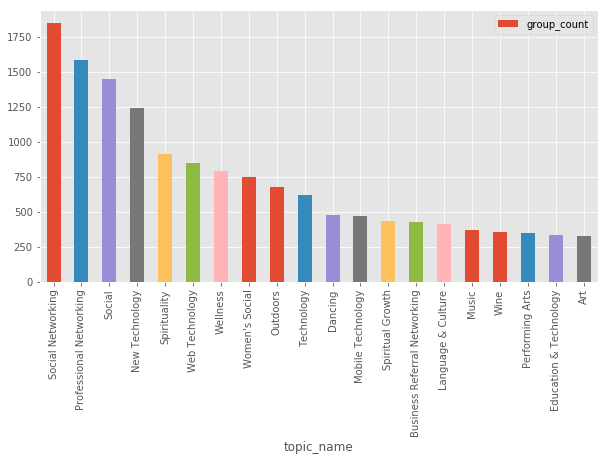

In [81]:
df_meetup_grouptopics = pd.DataFrame(meetup_grouptopics\
                                     .groupBy('topic_id','topic_name')\
                                     .agg({'group_id':'count'})\
                                     .sort(col('count(group_id)').desc())\
                                     .head(20),columns=['topic_id','topic_name','group_count'])
df_meetup_grouptopics.plot('topic_name','group_count',kind='bar',figsize=(10,5))

In [26]:
## Top 20 categories with most groups
meetup_groups.groupBy('category_id','`category.name`').agg({'group_id':'count'}).sort(col('count(group_id)').desc()).show(20)

+-----------+--------------------+---------------+
|category_id|       category.name|count(group_id)|
+-----------+--------------------+---------------+
|         34|                tech|           3644|
|          2|     career/business|           2544|
|         31|         socializing|           1278|
|         14|    health/wellbeing|            870|
|         16|language/ethnic i...|            665|
|         22|new age/spirituality|            553|
|         23|  outdoors/adventure|            533|
|         32|   sports/recreation|            502|
|         10|          food/drink|            494|
|          6|  education/learning|            409|
|         21|               music|            382|
|          1|   fine arts/culture|            380|
|          4|community/environ...|            367|
|         12|                LGBT|            356|
|          9|             fitness|            320|
|         33|             support|            291|
|         11|               gam

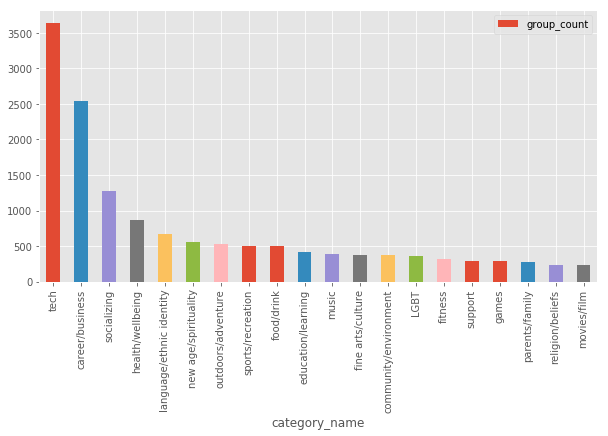

In [82]:
df_meetup_groups = pd.DataFrame(meetup_groups\
                                .groupBy('category_id','`category.name`')\
                                .agg({'group_id':'count'})\
                                .sort(col('count(group_id)').desc())\
                                     .head(20),columns=['category_id','category_name','group_count'])
df_meetup_groups.plot('category_name','group_count',kind='bar',figsize=(10,5))

In [29]:
## Joining member and group data
inner_groups_members_join = meetup_groups \
.select('group_id','category_id','`category.name`','`category.shortname`', 'members','group_name','rating',)\
.join(meetup_members, ['group_id'])

In [51]:
inner_groups_members_join.groupBy('group_id','group_name').agg({'member_id':'count'}).sort(col('count(member_id)').desc()).show()

+--------+--------------------+----------------+
|group_id|          group_name|count(member_id)|
+--------+--------------------+----------------+
| 1492775|20 and 30 Somethi...|           18134|
| 1453797|CoInvent NY (a.k....|           14165|
| 1475712|      Chicago Meetup|           13869|
| 1338658|Hudson Valley Hikers|           13549|
|18468562|I wanted to do th...|           13089|
|  446699|New York Entrepre...|           12699|
| 1569779|20 and 30 somethi...|           12506|
|  192035|The NYC Business ...|           12238|
|  107592|SQL NYC, The NoSQ...|           11967|
| 1945681|20s and 30s On Th...|           11726|
| 1192681|Free NYC! Free Th...|           11701|
| 1235637|Alternative to th...|           11620|
| 1730008|Google NYC Tech T...|           11393|
|19417644|Really Fun Things...|           11008|
|  477112|New York Creative...|           10625|
| 1034045|Free & Cheap Cult...|           10416|
| 1579989|Chicago Hiking, O...|           10390|
| 1515830|   The Pro

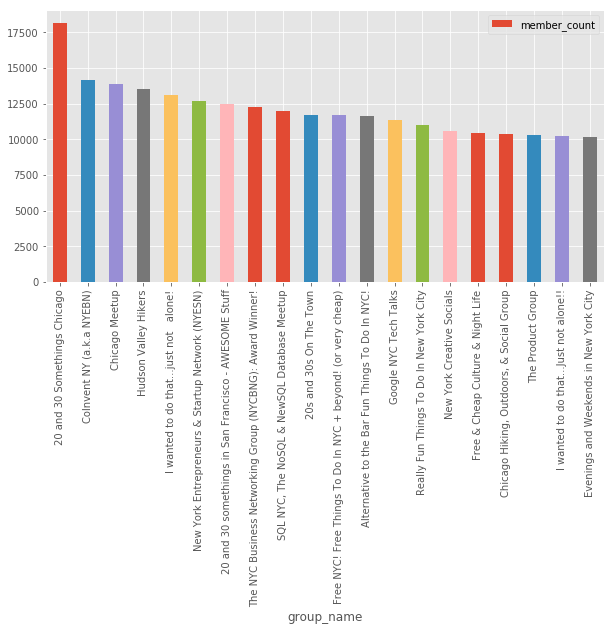

In [83]:
df_inner_groups_members_join = pd.DataFrame(inner_groups_members_join\
                                            .groupBy('group_id','group_name')\
                                            .agg({'member_id':'count'})\
                                            .sort(col('count(member_id)').desc())\
                                     .head(20),columns=['group_id','group_name','member_count'])
df_inner_groups_members_join.plot('group_name','member_count',kind='bar',figsize=(10,5))

In [31]:
## Top 20 group with most members
inner_groups_members_join.groupBy('group_id','group_name','`category.shortname`').agg({'member_id':'count'}).sort(col('count(member_id)').desc()).show(20)

+--------+--------------------+------------------+----------------+
|group_id|          group_name|category.shortname|count(member_id)|
+--------+--------------------+------------------+----------------+
| 1492775|20 and 30 Somethi...|       socializing|           18134|
| 1453797|CoInvent NY (a.k....|   career-business|           14165|
| 1475712|      Chicago Meetup|      arts-culture|           13869|
| 1338658|Hudson Valley Hikers|outdoors-adventure|           13549|
|18468562|I wanted to do th...|       socializing|           13089|
|  446699|New York Entrepre...|   career-business|           12699|
| 1569779|20 and 30 somethi...|       socializing|           12506|
|  192035|The NYC Business ...|   career-business|           12238|
|  107592|SQL NYC, The NoSQ...|              tech|           11967|
| 1945681|20s and 30s On Th...|       socializing|           11726|
| 1192681|Free NYC! Free Th...|       socializing|           11701|
| 1235637|Alternative to th...|       socializin

We can see from above table that maximum frequency of groups are from the category 'socializing' though the total number of groups for top 2 category is 'tech' & 'career/business'

In [33]:
inner_join_groups_topics = meetup_groups\
.select('group_id','category_id','`category.name`','`category.shortname`','created','rating')\
.join(meetup_grouptopics,['group_id'])

In [34]:
inner_join_member_grouptopics= meetup_members.join(meetup_grouptopics,['group_id'])

In [36]:
inner_join_member_grouptopics.select('group_id','member_id','member_name','topic_name','visited').show(10)

+--------+---------+-----------+--------------------+-------------------+
|group_id|member_id|member_name|          topic_name|            visited|
+--------+---------+-----------+--------------------+-------------------+
|  490552|        3|Matt Meeker|Business Referral...|2009-09-18 18:32:23|
|  490552|        3|Matt Meeker|              Social|2009-09-18 18:32:23|
|  490552|        3|Matt Meeker|      Web Technology|2009-09-18 18:32:23|
|  490552|        3|Matt Meeker|   Social Networking|2009-09-18 18:32:23|
| 1474611|        3|Matt Meeker|Professional Netw...|2011-03-20 01:02:11|
| 1474611|        3|Matt Meeker|          Technology|2011-03-20 01:02:11|
| 1474611|        3|Matt Meeker|      New Technology|2011-03-20 01:02:11|
| 1490492|        3|Matt Meeker|          Technology|2011-01-18 20:37:23|
| 1490492|        3|Matt Meeker|      Web Technology|2011-01-18 20:37:23|
| 1490492|        3|Matt Meeker|      New Technology|2011-01-18 20:37:23|
+--------+---------+-----------+------

In [37]:
inner_join_member_grouptopics\
.select('group_id','member_id','member_name','topic_name','visited')\
.groupby('group_id','member_id','member_name')\
.agg({'topic_name':'count'}).show()

+--------+---------+--------------------+-----------------+
|group_id|member_id|         member_name|count(topic_name)|
+--------+---------+--------------------+-----------------+
| 1748515|      335|               Barak|                1|
| 1455557|    26219|            mbennett|                1|
|  344877|    50690|              Kambri|                4|
|12722182|    52020|                 Nyx|                1|
|  236201|    66976|                Eric|                1|
|  386955|    78756|                joey|                4|
| 7569362|    78756|                joey|                2|
|18480375|    94707|    Oswald Campesato|                2|
|12783502|    98323|      Alfonso Guerra|                1|
|18338455|   108277|            Jennifer|                7|
|19851643|   114085|             Heather|                4|
| 1289479|   153692|               holly|                2|
| 1627081|   158716|Ryan Higginson-Scott|                5|
| 1985971|   164463|               Nancy

In [38]:
inner_join_member_grouptopics_groups = inner_join_member_grouptopics\
.join(meetup_groups.select('group_id','group_name'),['group_id'])

In [39]:
inner_join_member_grouptopics_groups\
.select('group_id','group_name','member_id','member_name','topic_name','visited')\
.groupby('group_id','group_name','member_id','member_name')\
.agg({'topic_name':'count'}).show()

+--------+--------------------+---------+----------------+-----------------+
|group_id|          group_name|member_id|     member_name|count(topic_name)|
+--------+--------------------+---------+----------------+-----------------+
|19134256|     Chicago FinTech|     4368|           Steve|                1|
| 1348320|  San Francisco Perl|     8013| Chip Salzenberg|                1|
| 4169292|NY Hardware Start-up|    18613|          Igor S|                1|
|10482562| Bi Boys' Happy Hour|    26315|         Michael|                1|
|19435796|Behavioral Econom...|    40251|   Noreen Whysel|                2|
| 1571490|   Film, Food & Fun!|    52020|             Nyx|                5|
|  321601|             SF Beta|    94707|Oswald Campesato|                5|
| 1610726|The Official Phon...|    94707|Oswald Campesato|                2|
| 3979102|          Angular-SF|    94707|Oswald Campesato|                1|
|   26434|The San Francisco...|   107055|         Shawn B|                3|

In [40]:
inner_join_member_grouptopics_groups\
.select('group_id','group_name','member_id','member_name','topic_name','visited')\
.groupby('group_id','group_name','member_id','member_name')\
.agg({'topic_name':'count'}).sort(asc('group_id'),col('count(topic_name)').desc()).show()

+--------+--------------------+---------+----------------+-----------------+
|group_id|          group_name|member_id|     member_name|count(topic_name)|
+--------+--------------------+---------+----------------+-----------------+
|10000142|SF Bay Area LGBT ...|  2750933|       FredeRick|                1|
|10000142|SF Bay Area LGBT ...|  4160140|     Hunter Ford|                1|
|10000142|SF Bay Area LGBT ...|184198845|   Derek Jackson|                1|
|10000142|SF Bay Area LGBT ...|152081442|   JasonSmith415|                1|
|10000142|SF Bay Area LGBT ...|211432923|    Errick Jones|                1|
|10000142|SF Bay Area LGBT ...|190335358|          Monica|                1|
|10000142|SF Bay Area LGBT ...|156466452|              DM|                1|
|10000142|SF Bay Area LGBT ...|154649102|Rick from Sac2SF|                1|
|10000142|SF Bay Area LGBT ...|182571648|       huggybear|                1|
|10000142|SF Bay Area LGBT ...| 78612232|   Lana Investor|                1|

In [41]:
inner_join_member_grouptopics_groups = inner_join_member_grouptopics.join(meetup_groups.select('group_id','group_name','`category.shortname`'),['group_id'])

In [42]:
### NYC Socials! meetup group members seems to discuss on most diverse topics 
inner_join_member_grouptopics_groups.where((col('`category.shortname`')=='socializing'))\
.groupby('group_id','group_name','member_id','member_name','`category.shortname`')\
.agg({'topic_name':'count'}).sort(col('count(topic_name)').desc()).show()

+--------+--------------------+---------+------------------+------------------+-----------------+
|group_id|          group_name|member_id|       member_name|category.shortname|count(topic_name)|
+--------+--------------------+---------+------------------+------------------+-----------------+
| 4139332|        NYC Socials!|214189264|        Alex avila|       socializing|                9|
|14383892|San Francisco Bay...|117844592|    Pratik Kesaria|       socializing|                9|
| 4139332|        NYC Socials!|208247120|          Thomas C|       socializing|                9|
| 4139332|        NYC Socials!| 21900831|          Veronica|       socializing|                9|
| 4139332|        NYC Socials!|  8333780|             Simon|       socializing|                9|
| 4139332|        NYC Socials!|183008319| JONATHAN JEFFRIES|       socializing|                9|
| 4139332|        NYC Socials!|189217479|             Bilal|       socializing|                9|
| 4139332|        NY

In [44]:
# Topics discussed by group with highest members
inner_join_member_grouptopics_groups.where((col('group_id')==1492775))\
.select('topic_name').distinct().show()

+--------------------+
|          topic_name|
+--------------------+
| Recreational Sports|
|            Outdoors|
|              Social|
|          Sports Fan|
|Sports and Recrea...|
|  20's & 30's Social|
+--------------------+



In [45]:
## Top 5 categories  
meetup_groups.groupBy("`category.shortname`").count().orderBy("count", ascending=False).show(5)

+------------------+-----+
|category.shortname|count|
+------------------+-----+
|              tech| 3644|
|   career-business| 2544|
|       socializing| 1278|
|  health-wellbeing|  870|
|          language|  665|
+------------------+-----+
only showing top 5 rows



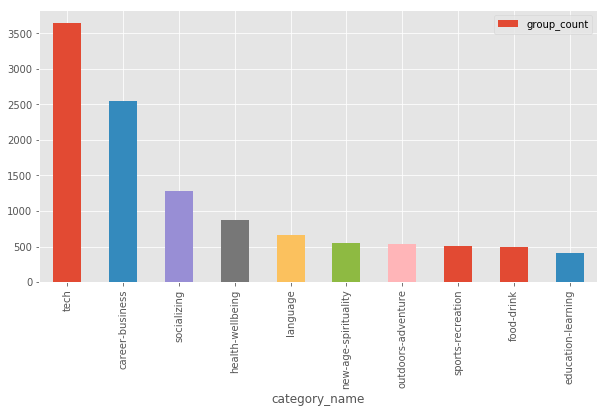

In [89]:
df_meetup_groups2 = pd.DataFrame(meetup_groups\
                                 .groupBy("`category.shortname`")\
                                 .count()\
                                 .orderBy("count", ascending=False)\
                                     .head(10),columns=['category_name','group_count'])
df_meetup_groups2.plot('category_name','group_count',kind='bar',figsize=(10,5))

In [47]:
#Top 5 topics discussed with in groups
innerjoin_group_grouptopics = meetup_groups.join(meetup_grouptopics,['group_id'])
innerjoin_group_grouptopics.groupBy('Topic_Name').count().orderBy("count", ascending=False).show(5)

+--------------------+-----+
|          Topic_Name|count|
+--------------------+-----+
|   Social Networking| 1848|
|Professional Netw...| 1582|
|              Social| 1447|
|      New Technology| 1239|
|        Spirituality|  916|
+--------------------+-----+
only showing top 5 rows



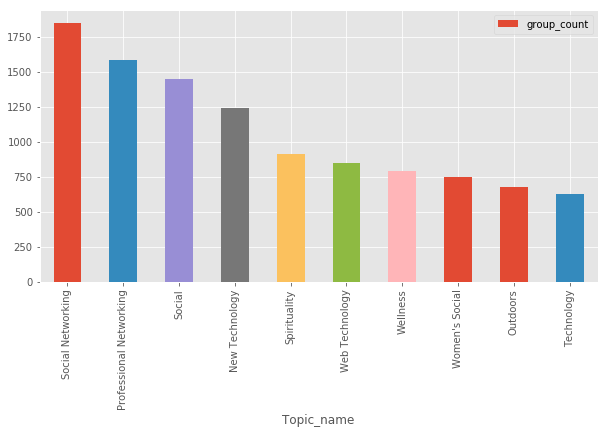

In [90]:
df_innerjoin_group_grouptopics = pd.DataFrame(innerjoin_group_grouptopics\
                                 .groupBy('Topic_Name')\
                                 .count()\
                                 .orderBy("count", ascending=False)\
                                     .head(10),columns=['Topic_name','group_count'])
df_innerjoin_group_grouptopics.plot('Topic_name','group_count',kind='bar',figsize=(10,5))

In [48]:
# Top 10 topics members are discussing about on various social groups
innerjoin_members_membertopics = meetup_members.join(meetup_membertopics,['member_id'])
innerjoin_members_membertopics.groupBy('Topic_Name').count().orderBy("count", ascending=False).show(10)

+----------+-------+
|Topic_Name|  count|
+----------+-------+
|  outdoors|1406833|
|   newtech|1350857|
|       art|1156219|
|    movies| 947161|
|     music| 877013|
+----------+-------+
only showing top 5 rows



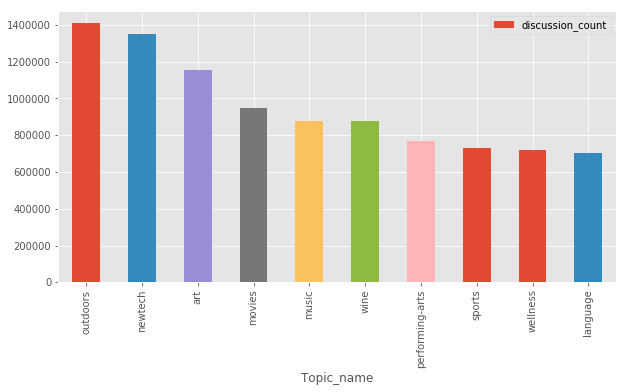

In [91]:
df_innerjoin_members_membertopics = pd.DataFrame(innerjoin_members_membertopics\
                                              .groupBy('Topic_Name')\
                                              .count()\
                                              .orderBy("count", ascending=False)\
                                     .head(10),columns=['Topic_name','discussion_count'])
df_innerjoin_members_membertopics.plot('Topic_name','discussion_count',kind='bar',figsize=(10,5))

In [53]:
#Top 10 events held with based on 'Yes' RSVP
meetup_events.select('event_id','event_name','group_id','yes_rsvp_count')\
.groupBy('event_name').agg({'yes_rsvp_count':'sum'}).sort(col('sum(yes_rsvp_count)').desc()).show(10)

+--------------------+-------------------+
|          event_name|sum(yes_rsvp_count)|
+--------------------+-------------------+
|Drinks and Dancin...|             1059.0|
|AXIS BNI Chapter ...|              980.0|
|Drinks and Dancin...|              948.0|
|NYC Creative and ...|              701.0|
|Live Sharks Tank ...|              252.0|
|BNI Chapter 56 We...|              244.0|
|Live Sharks Tank ...|              240.0|
|Live Sharks Tank ...|              216.0|
|Halloween Mix 'N ...|              204.0|
| Friday Night Drinks|              198.0|
+--------------------+-------------------+
only showing top 10 rows



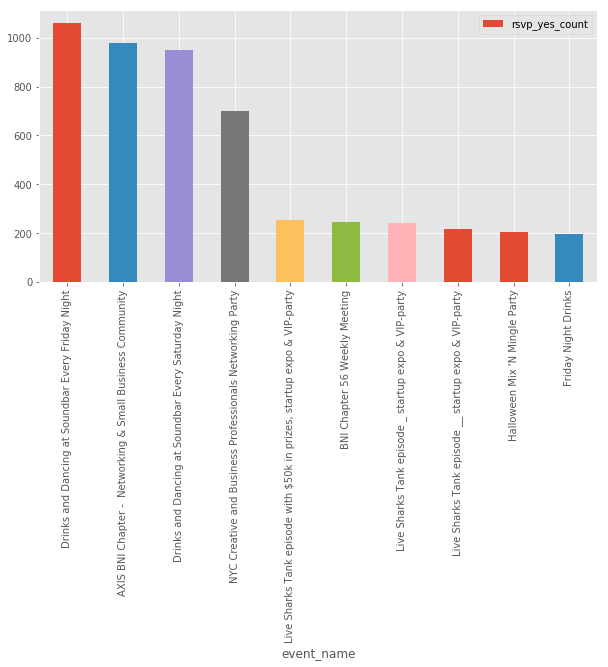

In [92]:
df_meetup_events = pd.DataFrame(meetup_events\
                                .select('event_id','event_name','group_id','yes_rsvp_count')\
                                .groupBy('event_name')\
                                .agg({'yes_rsvp_count':'sum'})\
                                .sort(col('sum(yes_rsvp_count)').desc())\
                                .head(10),columns=['event_name','rsvp_yes_count'])
df_meetup_events.plot('event_name','rsvp_yes_count',kind='bar',figsize=(10,5))

In [54]:
# Top 10 groups which host most number of events 
inner_join_groups_events = meetup_groups.join(meetup_events,['group_id'])
inner_join_groups_events.select('group_id','group_name','event_id','event_name').distinct().groupBy('group_name')\
.agg({'event_name':'count'}).sort(col('count(event_name)').desc()).show(10)

+--------------------+-----------------+
|          group_name|count(event_name)|
+--------------------+-----------------+
|Chicago Area Dist...|             1061|
|The San Francisco...|              298|
|      SF Free School|              134|
|      Chicago Meetup|              114|
|CASTRO STREET Dra...|              105|
|Mon/Thur Night Im...|              100|
|Drop-in Figure Dr...|              100|
|Figure Drawing Ch...|              100|
|Northside Freelan...|              100|
|Improv for Actors...|              100|
+--------------------+-----------------+
only showing top 10 rows



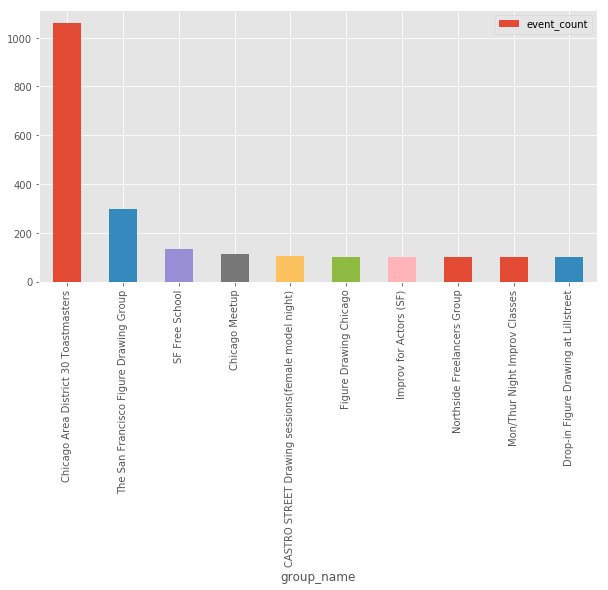

In [93]:
df_meetup_events = pd.DataFrame(inner_join_groups_events\
                                .select('group_id','group_name','event_id','event_name')\
                                .distinct().groupBy('group_name')\
                                .agg({'event_name':'count'}).sort(col('count(event_name)').desc())\
                                .head(10),columns=['group_name','event_count'])
df_meetup_events.plot('group_name','event_count',kind='bar',figsize=(10,5))

In [55]:
# Events held as per category 
inner_join_groups_events.select('event_id','event_name','`category.shortname`').distinct()\
.groupBy('`category.shortname`').agg({'event_name':'count'}).sort(col('count(event_name)').desc()).show()

+------------------+-----------------+
|category.shortname|count(event_name)|
+------------------+-----------------+
|   career-business|             3467|
|      arts-culture|             1960|
|        book-clubs|              330|
+------------------+-----------------+



In [56]:
innerjoin_group_grouptopics.select('`category.shortname`','topic_name','group_id')\
.groupBy('`category.shortname`','topic_name')\
.agg({'group_id':'count'}).sort(col('count(group_id)').desc()).show()

+--------------------+--------------------+---------------+
|  category.shortname|          topic_name|count(group_id)|
+--------------------+--------------------+---------------+
|     career-business|Professional Netw...|            991|
|                tech|      New Technology|            956|
|                tech|      Web Technology|            697|
|         socializing|   Social Networking|            545|
|                tech|          Technology|            502|
|         socializing|              Social|            492|
|                tech|   Mobile Technology|            429|
|new-age-spirituality|        Spirituality|            395|
|    health-wellbeing|            Wellness|            389|
|     career-business|Business Referral...|            346|
|     career-business|   Social Networking|            335|
|         socializing|      Women's Social|            297|
|    health-wellbeing|        Spirituality|            284|
|  outdoors-adventure|            Outdoo

In [57]:
innerjoin_group_grouptopics.select('`category.shortname`','topic_name','group_id')\
.groupBy('`category.shortname`','topic_name')\
.agg({'group_id':'count'}).where((col('`category.shortname`')=='career-business')).sort(col('count(group_id)').desc()).show(10)

+------------------+--------------------+---------------+
|category.shortname|          topic_name|count(group_id)|
+------------------+--------------------+---------------+
|   career-business|Professional Netw...|            991|
|   career-business|Business Referral...|            346|
|   career-business|   Social Networking|            335|
|   career-business|Social Media Mark...|            198|
|   career-business|      New Technology|            184|
|   career-business|Women's Business ...|            173|
|   career-business|Real Estate Inves...|            153|
|   career-business|      Web Technology|            112|
|   career-business|      Women's Social|            107|
|   career-business|              Social|             99|
+------------------+--------------------+---------------+
only showing top 10 rows

